In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn 
import re
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
os.getcwd()

'/kaggle/working'

In [3]:
! head /kaggle/input/titanic/*.csv

==> /kaggle/input/titanic/gender_submission.csv <==











==> /kaggle/input/titanic/test.csv <==











==> /kaggle/input/titanic/train.csv <==












In [4]:
def to_dataset(data):
    dataset = pd.read_csv(data)
    return dataset

In [5]:
train_dataset = to_dataset('/kaggle/input/titanic/train.csv')
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Percentage of missing values
train_dataset.isnull().sum()/len(train_dataset)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
train_dataset = train_dataset.dropna()
train_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [10]:
UNWANTED_COL = ['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked']
def data_prep(data, unwanted = UNWANTED_COL):
    gender_dict = {'female':0, 'male':1}
    for col in UNWANTED_COL:
        try:
            data = data.drop(columns = unwanted)
        except KeyError:
            continue
    label = data['Survived']
    data['Sex'].replace(gender_dict, inplace = True)
    data = data.drop(columns = 'Survived')
    return data, label

In [11]:
train_dataset, eval_dataset = train_test_split(train_dataset, train_size = 0.8)
train, train_label = data_prep(train_dataset)

In [12]:
model = LogisticRegression()
model.fit(train, train_label)

LogisticRegression()

In [13]:
eval_dataset, eval_label = data_prep(eval_dataset)

In [14]:
def model_acc(model, eval_dataset, eval_label):
    model_predict = model.predict(eval_dataset)
    return accuracy_score(eval_label, model_predict)
print(model_acc(model, eval_dataset, eval_label))

0.7837837837837838


In [15]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
print(test_data.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [16]:
data_raw = pd.read_csv('/kaggle/input/titanic/train.csv')
data_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
UNWANTED_AGE_TRAINING = ['PassengerId', 'Survived', 'Sex', 'Ticket', 'Cabin', 'Embarked' ]
def get_prefix(data, mode = 'train'):
    data['Prefix'] = data['Name'].astype('str').apply(lambda x : re.split('[,.]', x)[1])
    dum_df = pd.get_dummies(data['Prefix'])
    data = data.join(dum_df)
    pref_list = data['Prefix'].unique()
    print(data['Prefix'].value_counts())
    print('--------------------\n')
    print("Unique values of prefixs are: \n")
    print(data['Prefix'].unique(), '\n')
    print('--------------------\n')
    threshold = len(data) / 100
    prefix_drop_list = [col for col in pref_list if data['Prefix'].value_counts()[col] < threshold]
    if mode == 'train':
        for col in prefix_drop_list:
            data = data[data[col] != 1].reset_index(drop = True)
            data = data.drop(columns = col)
    elif mode == 'predict':
        filler = data['Prefix'].value_counts().idxmax()
        data['convert'] = data[prefix_drop_list].values.tolist()
        data['convert'] = data['convert'].apply(lambda x : all(x))
        print(data['convert'])
        data[filler] = data['convert'] | data[filler]
        data = data.drop(columns =  'convert')
    data = data.drop(columns = 'Prefix')
    return data, pref_list

def data_prep_age_fill(data, unwanted = UNWANTED_AGE_TRAINING):
    data = data.drop(columns = unwanted)
    data = data.drop(columns = ['Name'])
    data = data.dropna()
    label = data['Age']
    data = data.drop(columns = 'Age')
    return data, label

In [18]:
data, pref_list = get_prefix(data_raw)
data.head()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: Prefix, dtype: int64
--------------------

Unique values of prefixs are: 

[' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer'] 

--------------------



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Master,Miss,Mr,Mrs
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


In [19]:
data, eval_data = train_test_split(data, train_size = 0.8)
age_data, label = data_prep_age_fill(data)
eval_age_data, eval_age_label = data_prep_age_fill(eval_data)
print(age_data.head())
print(age_data.isnull().sum())

     Pclass  SibSp  Parch     Fare   Master   Miss   Mr   Mrs
262       3      1      0    7.775        0      0    1     0
190       2      1      1   26.000        1      0    0     0
7         3      3      1   21.075        1      0    0     0
611       3      0      0   16.100        0      0    1     0
488       1      1      2  151.550        0      0    0     1
Pclass     0
SibSp      0
Parch      0
Fare       0
 Master    0
 Miss      0
 Mr        0
 Mrs       0
dtype: int64


In [20]:
label.isnull().sum()

0

In [21]:
age_model = tree.DecisionTreeRegressor()
age_model.fit(age_data, label)

DecisionTreeRegressor()

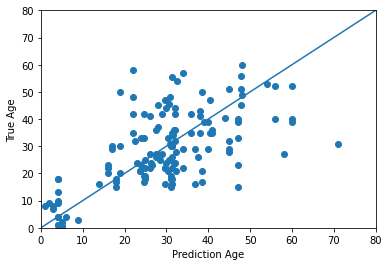

In [22]:
def model_mse(model, eval_dataset, eval_label):
    model_predict = model.predict(eval_dataset)
    return mean_squared_error(eval_label, model_predict)
predict = age_model.predict(eval_age_data)
x = np.linspace(0, 80, 100)
y = x
plt.plot(x, y)
plt.scatter(predict, eval_age_label)
plt.xlabel('Prediction Age')
plt.ylabel('True Age')
plt.xlim([0,80])
plt.ylim([0,80])
plt.show()

In [23]:
data_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [24]:
final_data, temp = get_prefix(data_raw)
final_data

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: Prefix, dtype: int64
--------------------

Unique values of prefixs are: 

[' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer'] 

--------------------



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Master,Miss,Mr,Mrs
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,0,0,0,1
860,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1,0,0
861,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,1,0,0
862,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0,1,0


In [25]:
def age_fill(data):
    age_prediction = pd.Series(age_model.predict(data[age_data.columns]))
    data['Age'] = data['Age'].fillna(age_prediction)
    return data
final_data = age_fill(final_data)

In [26]:
final_data['Embarked'] = final_data['Embarked'].fillna(max(final_data['Embarked'].value_counts()))

In [27]:
final_data['Embarked'].value_counts()

S      628
C      159
Q       75
628      2
Name: Embarked, dtype: int64

In [28]:
print(final_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', ' Master', ' Miss',
       ' Mr', ' Mrs'],
      dtype='object')


In [29]:
UNWANTED_COL_FINAL = UNWANTED_COL + pref_list.tolist()
print(UNWANTED_COL_FINAL)

['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked', ' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme', ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt', ' the Countess', ' Jonkheer']


In [30]:
for col in UNWANTED_COL_FINAL:
    try:
        final_data = final_data.drop(columns = col)
    except KeyError:
        continue

In [31]:
final_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [32]:
final_train_data, final_eval_data = train_test_split(final_data, train_size = 0.8)

In [33]:
final_train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [34]:
final_train_data, final_train_label = data_prep(final_train_data, UNWANTED_COL_FINAL)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [35]:
final_model = LogisticRegression(solver = 'newton-cg')
final_model.fit(final_train_data, final_train_label)

LogisticRegression(solver='newton-cg')

In [36]:
print(model_acc(final_model, eval_dataset, eval_label))

0.8378378378378378


In [37]:
test_raw = pd.read_csv('/kaggle/input/titanic/test.csv')
test_raw['Fare'] = test_raw['Fare'].fillna(test_raw['Fare'].mean())
test_data, tmp = get_prefix(test_raw, mode = 'predict')
print(test_data.head())
test_data = age_fill(test_data)
print(test_data)

 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Ms          1
 Dr          1
 Dona        1
Name: Prefix, dtype: int64
--------------------

Unique values of prefixs are: 

[' Mr' ' Mrs' ' Miss' ' Master' ' Ms' ' Col' ' Rev' ' Dr' ' Dona'] 

--------------------

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: convert, Length: 418, dtype: bool
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticke

In [38]:
test_data = test_data.drop(columns = 'Cabin')
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
 Col           0
 Dona          0
 Dr            0
 Master        0
 Miss          0
 Mr            0
 Mrs           0
 Ms            0
 Rev           0
dtype: int64

In [39]:
COLUMNS = [col for col in final_train_data.columns]
gender_dict = {'female':0, 'male':1}
test_data['Sex'] = test_data['Sex'].replace(gender_dict)
print(test_data.head())
Test_prediction = final_model.predict(test_data[COLUMNS])

   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   

    Age  SibSp  Parch   Ticket     Fare Embarked   Col   Dona   Dr   Master  \
0  34.5      0      0   330911   7.8292        Q     0      0    0        0   
1  47.0      1      0   363272   7.0000        S     0      0    0        0   
2  62.0      0      0   240276   9.6875        Q     0      0    0        0   
3  27.0      0      0   315154   8.6625        S     0      0    0        0   
4  22.0      1      1  3101298  12.2875        S     0      0    0        0   

    Miss     Mr   Mrs   Ms   Rev  
0      0   True     0    0 

In [40]:
print(len(Test_prediction))

418


In [41]:
prediction = pd.DataFrame(Test_prediction, columns = ['Survived'])
submission = prediction.set_index(test_raw['PassengerId'])
print(submission)
#submission = pd.concat([test_raw['PassengerId'], prediction], axis = 1).reset_index()
#print(submission)

             Survived
PassengerId          
892                 0
893                 0
894                 0
895                 0
896                 1
...               ...
1305                0
1306                1
1307                0
1308                0
1309                0

[418 rows x 1 columns]


In [42]:
submission.to_csv('submission.csv')